# DATA MODELLING AND CORRELATION ON ANZ DATASET

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Extraction

In [2]:
data=pd.read_excel('/storage/emulated/0/Android/data/ru.iiec.pydroid3/files/ANZ synthesised transaction dataset.xlsx',engine='openpyxl')

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
for feat in data.columns:
    print(data[feat].value_counts())

authorized    7717
posted        4326
Name: status, dtype: int64
1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64
0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64
ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64
AUD    12043
Name: currency, dtype: int64
153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BA

## Feature Correlation 1

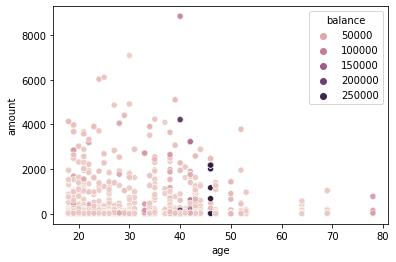

In [7]:
sns.scatterplot(x=data['age'],y=data['amount'],hue=data['balance'],data=data)

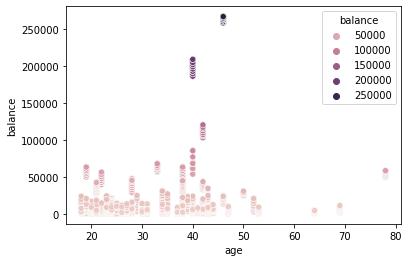

In [8]:
sns.scatterplot(x=data['age'],y=data['balance'],hue=data['balance'],data=data)

In [9]:
corr_matrix=data.corr()
corr_matrix['balance'].sort_values(ascending=False)

balance              1.000000
age                  0.199329
amount               0.059178
card_present_flag    0.005925
merchant_code             NaN
Name: balance, dtype: float64

The annual salary(balance) correlates with less features apparently just four(4) and even with low correlation values.

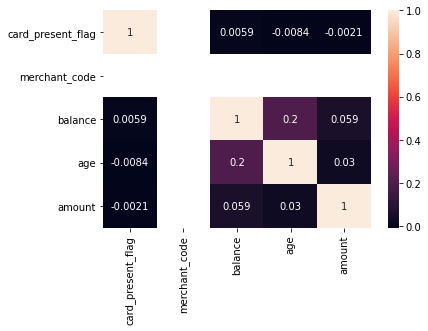

In [10]:
sns.heatmap(data.corr(method='pearson'),annot=True)

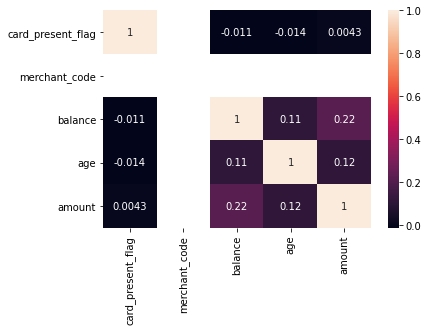

In [11]:
sns.heatmap(data.corr(method='spearman'),annot=True)

# Feature Engineering

In [12]:
cat_var_1=['status','txn_description','gender','merchant_state','movement']
for feat in cat_var_1:
    dummies=pd.get_dummies(data[feat]).add_prefix(feat+'_')
    data=pd.concat([data,dummies],axis=1).drop(feat,axis=1)    

## Customer ID

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   card_present_flag           7717 non-null   float64       
 1   bpay_biller_code            885 non-null    object        
 2   account                     12043 non-null  object        
 3   currency                    12043 non-null  object        
 4   long_lat                    12043 non-null  object        
 5   merchant_id                 7717 non-null   object        
 6   merchant_code               883 non-null    float64       
 7   first_name                  12043 non-null  object        
 8   balance                     12043 non-null  float64       
 9   date                        12043 non-null  datetime64[ns]
 10  age                         12043 non-null  int64         
 11  merchant_suburb             7717 non-null   object    

In [14]:
id_map=data.groupby('customer_id')['balance'].mean().to_dict()
data['customer_id']=data['customer_id'].map(id_map)

## Dropping Features

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   card_present_flag           7717 non-null   float64       
 1   bpay_biller_code            885 non-null    object        
 2   account                     12043 non-null  object        
 3   currency                    12043 non-null  object        
 4   long_lat                    12043 non-null  object        
 5   merchant_id                 7717 non-null   object        
 6   merchant_code               883 non-null    float64       
 7   first_name                  12043 non-null  object        
 8   balance                     12043 non-null  float64       
 9   date                        12043 non-null  datetime64[ns]
 10  age                         12043 non-null  int64         
 11  merchant_suburb             7717 non-null   object    

In [16]:
data.drop(['country','merchant_code','transaction_id','bpay_biller_code','currency','extraction','merchant_id','merchant_suburb'],axis=1,inplace=True)

## Reconstruting Features To Improve Correlation

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   card_present_flag           7717 non-null   float64       
 1   account                     12043 non-null  object        
 2   long_lat                    12043 non-null  object        
 3   first_name                  12043 non-null  object        
 4   balance                     12043 non-null  float64       
 5   date                        12043 non-null  datetime64[ns]
 6   age                         12043 non-null  int64         
 7   amount                      12043 non-null  float64       
 8   customer_id                 12043 non-null  float64       
 9   merchant_long_lat           7717 non-null   object        
 10  status_authorized           12043 non-null  uint8         
 11  status_posted               12043 non-null  uint8     

In [18]:
len(data.account.unique())

100

In [19]:
data.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [20]:
acct_map=data.groupby('account')['balance'].mean().to_dict()
data['account']=data['account'].map(acct_map)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   card_present_flag           7717 non-null   float64       
 1   account                     12043 non-null  float64       
 2   long_lat                    12043 non-null  object        
 3   first_name                  12043 non-null  object        
 4   balance                     12043 non-null  float64       
 5   date                        12043 non-null  datetime64[ns]
 6   age                         12043 non-null  int64         
 7   amount                      12043 non-null  float64       
 8   customer_id                 12043 non-null  float64       
 9   merchant_long_lat           7717 non-null   object        
 10  status_authorized           12043 non-null  uint8         
 11  status_posted               12043 non-null  uint8     

## Reconstructing First_Name Feature

In [22]:
data['first_name'].unique()

array(['Diana', 'Michael', 'Rhonda', 'Robert', 'Kristin', 'Tonya',
       'Fernando', 'Isaiah', 'Ricky', 'Jeffrey', 'Patrick', 'Karen',
       'Ruth', 'Kimberly', 'Joseph', 'Tiffany', 'Emily', 'Christine',
       'Ryan', 'Michelle', 'Richard', 'Jessica', 'Ronald', 'Kaitlyn',
       'Lori', 'Virginia', 'Andrew', 'Susan', 'Luis', 'Gregory', 'Barry',
       'Daniel', 'Renee', 'Amy', 'Christopher', 'Marissa', 'Eric',
       'Natasha', 'Edward', 'Craig', 'Sandra', 'Debra', 'Michele',
       'Antonio', 'Tyler', 'Lucas', 'Jonathan', 'Matthew', 'James',
       'Mackenzie', 'Linda', 'Dustin', 'Heather', 'Derek', 'Scott',
       'Charles', 'Tim', 'Melissa', 'Darren', 'Jacqueline', 'Cindy',
       'Stephanie', 'Rachael', 'Mary', 'Maria', 'Timothy', 'Nathaniel',
       'Elizabeth', 'Paul', 'Sarah', 'Alexander', 'Donald', 'Kenneth',
       'Ashley', 'Catherine', 'Billy', 'Abigail', 'Brian', 'David',
       'Robin'], dtype=object)

In [23]:
len(data['first_name'].unique())

80

In [24]:
name_map=data.groupby('first_name')['balance'].mean().to_dict()
data['first_name']=data['first_name'].map(name_map)

## Handling Datetime Feature

In [25]:
data['Date Year']=data['date'].dt.year
data['Date Month']=data['date'].dt.month
data['Date Day']=data['date'].dt.day
data.drop('date',axis=1,inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   card_present_flag           7717 non-null   float64
 1   account                     12043 non-null  float64
 2   long_lat                    12043 non-null  object 
 3   first_name                  12043 non-null  float64
 4   balance                     12043 non-null  float64
 5   age                         12043 non-null  int64  
 6   amount                      12043 non-null  float64
 7   customer_id                 12043 non-null  float64
 8   merchant_long_lat           7717 non-null   object 
 9   status_authorized           12043 non-null  uint8  
 10  status_posted               12043 non-null  uint8  
 11  txn_description_INTER BANK  12043 non-null  uint8  
 12  txn_description_PAY/SALARY  12043 non-null  uint8  
 13  txn_description_PAYMENT     120

## Filling Nan Entries In Card Present Flag Feature

In [27]:
data['card_present_flag'].value_counts()
median=data['card_present_flag'].median()
data['card_present_flag']=data['card_present_flag'].fillna(median)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   card_present_flag           12043 non-null  float64
 1   account                     12043 non-null  float64
 2   long_lat                    12043 non-null  object 
 3   first_name                  12043 non-null  float64
 4   balance                     12043 non-null  float64
 5   age                         12043 non-null  int64  
 6   amount                      12043 non-null  float64
 7   customer_id                 12043 non-null  float64
 8   merchant_long_lat           7717 non-null   object 
 9   status_authorized           12043 non-null  uint8  
 10  status_posted               12043 non-null  uint8  
 11  txn_description_INTER BANK  12043 non-null  uint8  
 12  txn_description_PAY/SALARY  12043 non-null  uint8  
 13  txn_description_PAYMENT     120

In [29]:
data.describe()

,card_present_flag,account,first_name,balance,age,amount,customer_id,status_authorized,status_posted,txn_description_INTER BANK,...,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit,Date Year,Date Month,Date Day
count,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,...,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.0,12043.000000,12043.000000
mean,0.873536,14704.195553,14704.195553,14704.195553,30.582330,187.933588,14704.195553,0.640787,0.359213,0.061613,...,0.129204,0.034460,0.005646,0.176949,0.091339,0.073321,0.926679,2018.0,9.011957,15.862908
std,0.332385,31314.422651,30449.025689,31503.722652,10.046343,592.599934,31314.422651,0.479790,0.479790,0.240460,...,0.335439,0.182415,0.074933,0.381642,0.288103,0.260673,0.260673,0.0,0.816511,8.899598
min,0.000000,1191.291419,1735.120675,0.240000,18.000000,0.100000,1191.291419,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0,8.000000,1.000000
25%,1.000000,3693.480219,4024.437245,3158.585000,22.000000,16.000000,3693.480219,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.0,8.000000,8.000000
50%,1.000000,6138.652540,6942.689862,6432.010000,28.000000,29.000000,6138.652540,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.0,9.000000,16.000000
75%,1.000000,11885.744948,13368.370517,12465.945000,38.000000,53.655000,11885.744948,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.0,10.000000,24.000000
max,1.000000,263753.766119,263753.766119,267128.520000,78.000000,8835.980000,263753.766119,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.0,10.000000,31.000000


## Handling Longitude And Latitude Feature

In [30]:
print(data.long_lat)

0        153.41 -27.95
1        153.41 -27.95
2        151.23 -33.94
3        153.10 -27.66
4        153.41 -27.95
             ...      
12038    149.83 -29.47
12039    151.22 -33.87
12040    151.12 -33.89
12041    144.96 -37.76
12042    150.92 -33.77
Name: long_lat, Length: 12043, dtype: object


In [31]:
#Splitting the object entry containg the longitude and latitude values into their respective feature columns
ll_data=data.long_lat
data['Longitude']=data.long_lat.copy()
data['Latitude']=data.long_lat.copy()

for i in range(len(ll_data)):
    b=ll_data[i].split('-')[0]
    c=ll_data[i].split('-')[1]    
    data['Longitude'][i]=b
    data['Latitude'][i]=c

<ipython-input-31-56ceef3ff36c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Longitude'][i]=b
<ipython-input-31-56ceef3ff36c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Latitude'][i]=c


In [32]:
data['Longitude'].value_counts()

153.41     723
151.23     417
116.06     292
151.27     280
115.79     261
          ... 
145.18      44
149.19      37
145.09      34
130.98      31
147.61      25
Name: Longitude, Length: 87, dtype: int64

In [33]:
data['Latitude'].value_counts()

27.95    578
37.84    457
37.76    352
27.66    339
33.94    303
        ... 
33.93     55
38.03     52
35.25     40
21.15     37
12.49     31
Name: Latitude, Length: 85, dtype: int64

In [34]:
data['Longitude']=data['Longitude'].astype('float64')
data['Latitude']=data['Latitude'].astype('float64')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   card_present_flag           12043 non-null  float64
 1   account                     12043 non-null  float64
 2   long_lat                    12043 non-null  object 
 3   first_name                  12043 non-null  float64
 4   balance                     12043 non-null  float64
 5   age                         12043 non-null  int64  
 6   amount                      12043 non-null  float64
 7   customer_id                 12043 non-null  float64
 8   merchant_long_lat           7717 non-null   object 
 9   status_authorized           12043 non-null  uint8  
 10  status_posted               12043 non-null  uint8  
 11  txn_description_INTER BANK  12043 non-null  uint8  
 12  txn_description_PAY/SALARY  12043 non-null  uint8  
 13  txn_description_PAYMENT     120

In [36]:
data.drop(['long_lat','merchant_long_lat'],axis=1,inplace=True)

In [37]:
lat_mean,lat_std=data['Latitude'].mean(),data['Latitude'].std()
cut_off=lat_std*0.5
lower,upper=lat_mean-cut_off,lat_mean+cut_off
outliers=[data for data in data['Latitude'] if data<lower or data>upper]
print('Identified Outlier:{}'.format(len(outliers)))

for out in outliers:
    data['Latitude'][data['Latitude']==out]=lat_mean
    

long_mean,long_std=data['Longitude'].mean(),data['Longitude'].std()
cut_off=long_std*3
lower,upper=long_mean-cut_off,long_mean+cut_off
outliers=[data for data in data['Longitude'] if data<lower or data>upper]
print('Identified Outlier:{}'.format(len(outliers)))

for out in outliers:
    data['Longitude'][data['Longitude']==out]=long_mean    

Identified Outlier:123


<ipython-input-37-db9805729193>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Latitude'][data['Latitude']==out]=lat_mean


Identified Outlier:123


<ipython-input-37-db9805729193>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Longitude'][data['Longitude']==out]=long_mean


## Feature Correlation After Feature Engineering

In [38]:
corr_matrix=data.corr()
corr_matrix['balance'].sort_values(ascending=False)

balance                       1.000000
account                       0.993991
customer_id                   0.993991
first_name                    0.966522
age                           0.199329
Latitude                      0.131207
status_posted                 0.120117
Date Month                    0.099208
gender_M                      0.080302
txn_description_INTER BANK    0.074174
txn_description_PAYMENT       0.073110
merchant_state_VIC            0.072843
txn_description_PHONE BANK    0.067239
amount                        0.059178
card_present_flag             0.037971
Date Day                      0.016902
txn_description_PAY/SALARY    0.013739
movement_credit               0.013739
Longitude                    -0.004185
merchant_state_ACT           -0.005491
merchant_state_TAS           -0.007830
movement_debit               -0.013739
merchant_state_SA            -0.021312
merchant_state_NT            -0.038271
merchant_state_WA            -0.049664
txn_description_POS      

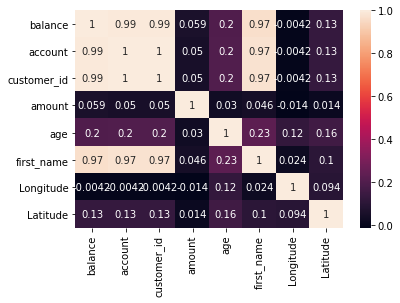

In [39]:
data_c=data[['balance','account','customer_id','amount','age','first_name','Longitude','Latitude']]
sns.heatmap(data_c.corr(method='pearson'),annot=True)

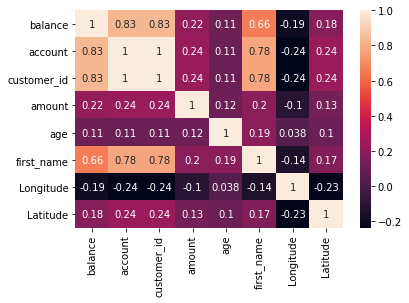

In [40]:
sns.heatmap(data_c.corr(method='spearman'),annot=True)

After performing feature engineering on the dataset we can observe that much more data are correlating with each other, and even with stronger correlation values.

Now lets examine some correlations amongst the engineered features.

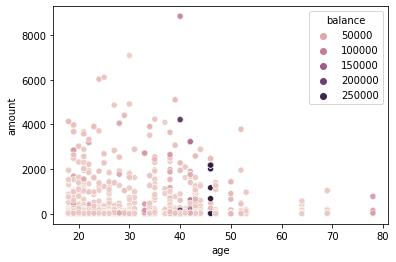

In [41]:
sns.scatterplot(x='age',y='amount',hue='balance',data=data)

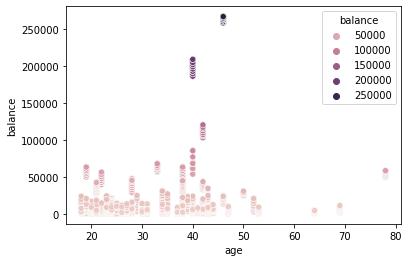

In [42]:
sns.scatterplot(x='age',y='balance',hue='balance',data=data)

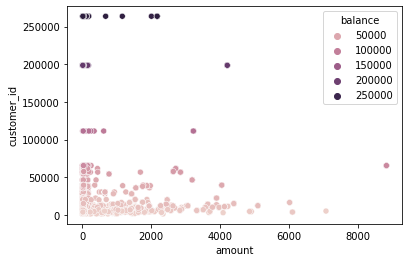

In [43]:
sns.scatterplot(x='amount',y='customer_id',hue='balance',data=data)

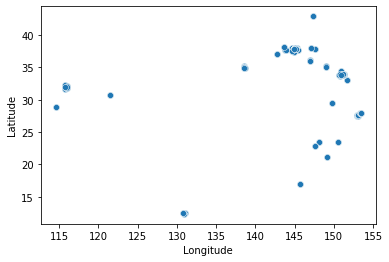

In [44]:
sns.scatterplot(x='Longitude',y='Latitude',data=data)

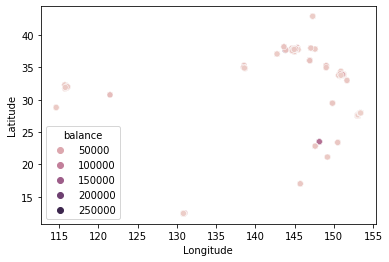

In [45]:
sns.scatterplot(x='Longitude',y='Latitude',hue='balance',data=data)

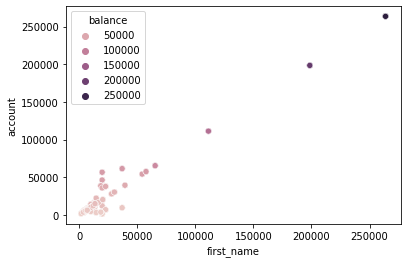

In [46]:
sns.scatterplot(x='first_name',y='account',hue='balance',data=data)

## Splitting The Dataset For Model Training

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   card_present_flag           12043 non-null  float64
 1   account                     12043 non-null  float64
 2   first_name                  12043 non-null  float64
 3   balance                     12043 non-null  float64
 4   age                         12043 non-null  int64  
 5   amount                      12043 non-null  float64
 6   customer_id                 12043 non-null  float64
 7   status_authorized           12043 non-null  uint8  
 8   status_posted               12043 non-null  uint8  
 9   txn_description_INTER BANK  12043 non-null  uint8  
 10  txn_description_PAY/SALARY  12043 non-null  uint8  
 11  txn_description_PAYMENT     12043 non-null  uint8  
 12  txn_description_PHONE BANK  12043 non-null  uint8  
 13  txn_description_POS         120

In [49]:
X=data.drop('balance',axis=1)
y=data.balance

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=16)

## Linear Regression Model

In [51]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Train set score:{:.3f}'.format(lr.score(X_train,y_train)))
print('Test set score:{:.3f}'.format(lr.score(X_test,y_test)))

Train set score:0.996
Test set score:0.995


## Tree Model

In [52]:
dt=DecisionTreeRegressor(random_state=16)
dt.fit(X_train,y_train)
print('Train set score:{:.3f}'.format(dt.score(X_train,y_train)))
print('Test set score:{:.3f}'.format(dt.score(X_test,y_test)))

Train set score:1.000
Test set score:0.999


# Evaluation Metric Analysis

## R2 Accuracy Score

In [53]:
linear_pred=lr.predict(X_test)
tree_pred=dt.predict(X_test)

In [54]:
print('R squared value for linear regression model:{:.3f}'.format(r2_score(y_test,linear_pred)))
print('R squared value for decision tree regression model:{:.3f}'.format(r2_score(y_test,tree_pred)))

R squared value for linear regression model:0.995
R squared value for decision tree regression model:0.999


Without skeptically parameter tuning we can see that decision tree regression model perform better than the linear regression model using the r2 accuracy score

## Root mean squared error

In [55]:
lin_mse=mean_squared_error(y_test,linear_pred)
lin_rmse=np.sqrt(lin_mse)
print('Root Mean Square For The Linear Regression Model:{:.3f}'.format(lin_rmse))

dt_mse=mean_squared_error(y_test,tree_pred)
dt_rmse=np.sqrt(dt_mse)
print('Root Mean Square For The Decision Tree Regression Model:{:.3f}'.format(dt_rmse))

Root Mean Square For The Linear Regression Model:2137.456
Root Mean Square For The Decision Tree Regression Model:936.439


The average balance during over the 3 recorded months is about 14700 so a mean error of about 936 australian dollar is pretty much fine to work with compared to a mean error of 2137 australian dollar which although isn't so bad either.

## Conclusion

Therefore we can conclude that the decision tree regressor is a better regression model for the ANZ synthesised transaction dataset.